In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import scipy.stats as st
# import seaborn as sns

In [2]:
path = 'EA_des1_df'
d1_df = pd.read_csv(path)
print(d1_df.columns)

Index(['Unnamed: 0', 'MMM-YY', 'Emp_ID', 'Age', 'Gender', 'City',
       'Education_Level', 'Salary', 'Dateofjoining', 'LastWorkingDate',
       'Joining Designation', 'Designation', 'Total Business Value',
       'Quarterly Rating'],
      dtype='object')


In [3]:
path2 = 'EA_new_df'
new_df = pd.read_csv(path2)
print(new_df.columns)
tenure_df = new_df[['Emp_ID','Tenure']]
tenure_df.head()
d1_tenure_df = pd.merge(d1_df,tenure_df, on='Emp_ID', how='left')
d1_tenure_df.head()

Index(['Unnamed: 0', 'Emp_ID', 'Dateofjoining', 'LastWorkingDate', 'Tenure',
       'Left_Company', 'Start_date', 'End_date', 'Current_Designation',
       'Joining Designation'],
      dtype='object')


,Unnamed: 0,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating,Tenure
0,0,2016-01-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,2381060,2,78
1,1,2016-02-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,-665480,2,78
2,2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,0,2,78
3,10,2016-01-01,5,29,Male,C9,College,46368,2016-01-09,NaN,1,1,0,1,58
4,11,2016-02-01,5,29,Male,C9,College,46368,2016-01-09,NaN,1,1,120360,1,58


751


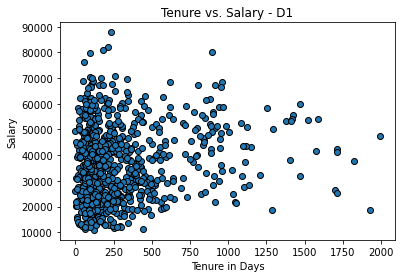

In [4]:
# get tenure from data_clean csv
gr_d1t = d1_tenure_df.groupby('Emp_ID')
print(len(gr_d1t))

# scatter tenure vs Salary
x=gr_d1t['Tenure'].mean()
y=gr_d1t['Salary'].mean()
plt.scatter(x,y,edgecolors='k')
plt.title('Tenure vs. Salary - D1')
plt.xlabel('Tenure in Days')
plt.ylabel('Salary')
plt.show()
# FINDINGS: low correlation



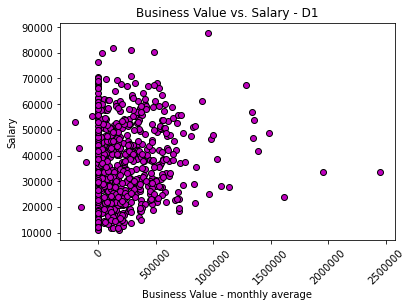

In [5]:
# get sum business value for each employee
pd.options.display.float_format = '{:.2f}'.format

bv_sum = gr_d1t['Total Business Value'].sum()

# get mean monthly business value for employee
bv_avg = gr_d1t['Total Business Value'].mean()

# scatter Salary vs Business Value mean
plt.scatter(bv_avg,y,facecolors='m',edgecolors='k')
plt.ticklabel_format(style='plain')
plt.title('Business Value vs. Salary - D1')
plt.xlabel('Business Value - monthly average')
plt.ylabel('Salary')
plt.xticks(rotation=45)
plt.show()

# FINDINGS: Business value does not explain Salary difference
# s value for tenure

# hover info emp id? 

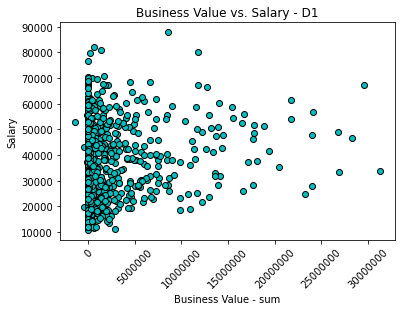

In [6]:
# scatter Salary vs Business Value sum 
plt.scatter(bv_sum,y,facecolors='c',edgecolors='k')
plt.ticklabel_format(style='plain')
plt.title('Business Value vs. Salary - D1')
plt.xlabel('Business Value - sum')
plt.xticks(rotation=45)
plt.ylabel('Salary')
plt.show()
# FINDINGS: Slightly more positive correlation (on sight) than previous but still no clear correlation.
# 0 values still piled up at all Salary levels

In [7]:
# Pinpoint employees 10-15
# Top Business Value sum
# Top Business Value mean
# Top Salary
# Longest Tenure


top_sum = bv_sum.sort_values(ascending=False)
top_monthly = bv_avg.sort_values(ascending=False)
long_tenure = x.sort_values(ascending=False)
top_sal = y.sort_values(ascending=False)


sum_20 = top_sum.head(20)
monthly_20 = top_monthly.head(20)
long_20 = long_tenure.head(20)
sal_20 = top_sal.head(20)

top20_df = pd.merge(long_20,sal_20, on='Emp_ID',how='outer')
# top20_df

In [8]:
top20_df = pd.merge(top20_df, monthly_20, on='Emp_ID',how='outer')
top20_df = top20_df.rename(columns = {'Total Business Value':'Average Monthly Business Value'})

In [9]:
top20_df = pd.merge(top20_df, sum_20, on='Emp_ID',how='outer')
top20_df = top20_df.reset_index()
# top20_df

In [10]:
top20_matrix = top20_df.corr()
top20_matrix

,Emp_ID,Tenure,Salary,Average Monthly Business Value,Total Business Value
Emp_ID,1.00,0.24,-0.07,-0.12,-0.16
Tenure,0.24,1.00,nan,nan,nan
Salary,-0.07,nan,1.00,-1.00,nan
Average Monthly Business Value,-0.12,nan,-1.00,1.00,0.62
Total Business Value,-0.16,nan,nan,0.62,1.00


In [12]:
sum_188 = top_sum.head(188)
monthly_188 = top_monthly.head(188)
long_188 = long_tenure.head(188)
sal_188 = top_sal.head(188)

top188_df = pd.merge(long_188, sal_188, on='Emp_ID',how='outer')

In [13]:
top188_df = pd.merge(top188_df, monthly_188, on='Emp_ID',how='outer')
top188_df = top188_df.rename(columns = {'Total Business Value':'Average Monthly Business Value'})

In [14]:
top188_df = pd.merge(top188_df, sum_188, on='Emp_ID',how='outer')
top188_df = top188_df.reset_index()

In [15]:
top188_matrix = top188_df.corr()
top188_matrix
# little correlation

,Emp_ID,Tenure,Salary,Average Monthly Business Value,Total Business Value
Emp_ID,1.00,0.07,0.00,-0.03,-0.02
Tenure,0.07,1.00,-0.10,0.02,0.31
Salary,0.00,-0.10,1.00,-0.04,-0.05
Average Monthly Business Value,-0.03,0.02,-0.04,1.00,0.76
Total Business Value,-0.02,0.31,-0.05,0.76,1.00


In [ ]:
# try random samples